In [6]:
library(lme4)
library(car)
library(lmerTest)
library(tidyverse)
library(ragg)
library(HLMdiag)
library(VCA)
library(hrbrthemes)
library(ggResidpanel)

# Forced-choice survey LMER

In [7]:
df = read_csv("../clean_data/forced_choice_emotion_uw_students_long_format_lmer.csv")


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  participantId = col_double(),
  photoId = col_character(),
  emotion = col_character(),
  ethnicity = col_character(),
  sex = col_character(),
  age = col_character(),
  label = col_character(),
  url = col_character(),
  sentimentScore = col_double(),
  sexC = col_double(),
  ageC = col_double(),
  ethnicityC = col_double()
)




In [8]:
head(df)

participantId,photoId,emotion,ethnicity,sex,age,label,url,sentimentScore,sexC,ageC,ethnicityC
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,Q2.1,Neutral,bipoc,female,adult,anger,https://uwmadison.co1.qualtrics.com/ControlPanel/Graphic.php?IM=IM_bJXdODAZHOaG0rI,0.0000,-0.5,0.5,-0.5
0,Q163.1,Happiness,white,male,child,happiness,https://uwmadison.co1.qualtrics.com/ControlPanel/Graphic.php?IM=IM_eWnGys8SLE5J3Cu,0.5574,0.5,-0.5,0.5
0,Q77.1,Disgust,bipoc,male,adult,disgust,https://uwmadison.co1.qualtrics.com/ControlPanel/Graphic.php?IM=IM_1Zx26VAbwv9uFFQ,-0.5994,0.5,0.5,-0.5
0,Q78.1,Disgust,bipoc,male,child,disgust,https://uwmadison.co1.qualtrics.com/ControlPanel/Graphic.php?IM=IM_bjzYq2UEKkXH7aC,-0.5994,0.5,-0.5,-0.5
0,Q162.1,Happiness,white,male,adult,happiness,https://uwmadison.co1.qualtrics.com/ControlPanel/Graphic.php?IM=IM_3NR7AkPxBUkdOQe,0.5574,0.5,0.5,0.5
0,Q79.1,Uncertain,white,female,adult,disgust,https://uwmadison.co1.qualtrics.com/ControlPanel/Graphic.php?IM=IM_5hkOSrFORUoHopM,-0.2960,-0.5,0.5,0.5


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



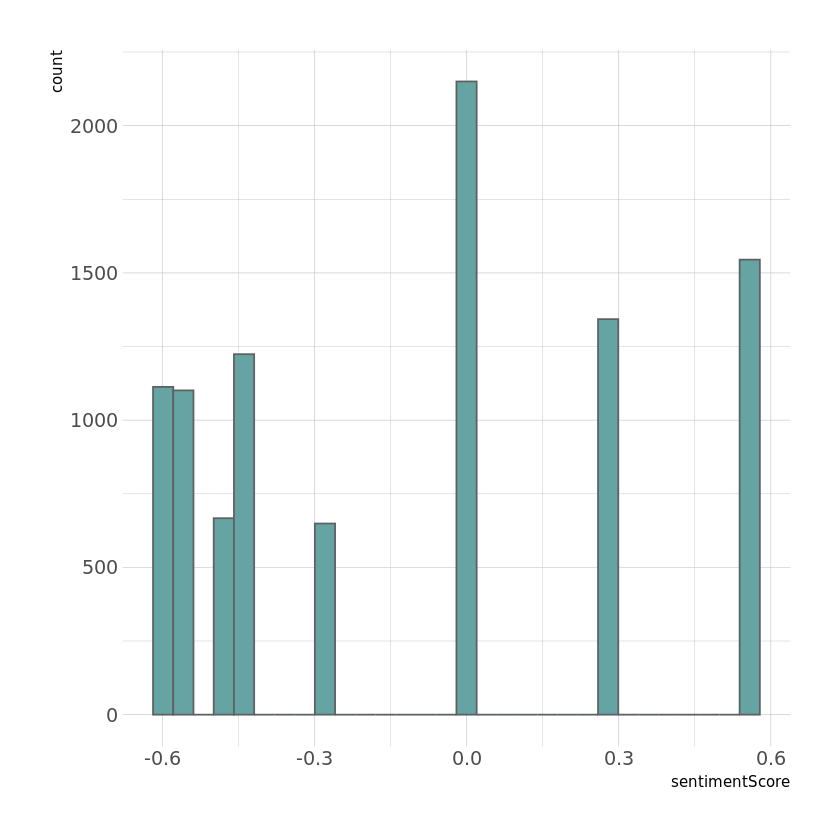

In [9]:
df %>%  ggplot(aes(x=sentimentScore)) +
    geom_histogram(color="#5e6162", fill="#66a3a3") +
    theme_ipsum()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



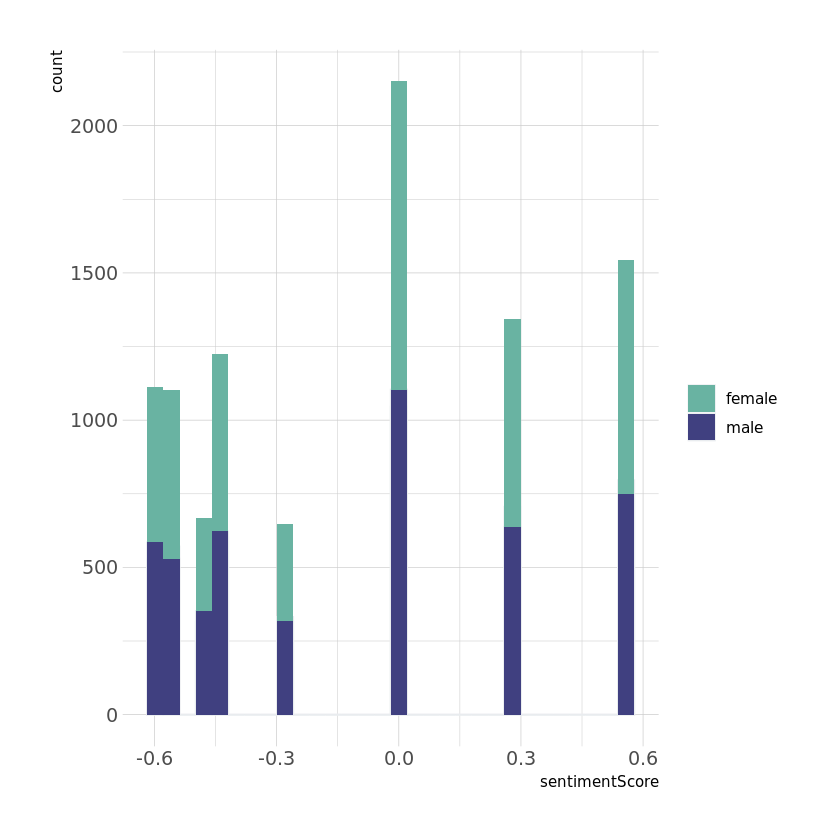

In [10]:
by.sex <- df %>%
  ggplot( aes(x=sentimentScore, fill=sex)) +
    geom_histogram( color="#e9ecef", alpha=0.6, position = 'identity') +
    scale_fill_manual(values=c("#69b3a2", "#404080")) +
    theme_ipsum() +
    stat_bin(bins=30) +
    labs(fill="")
by.sex

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



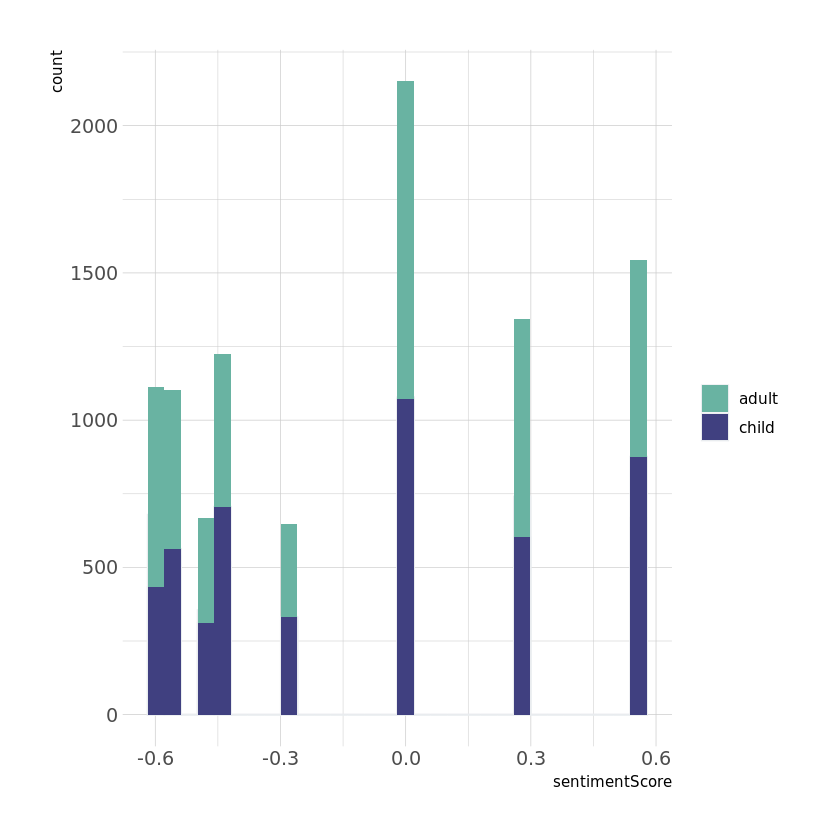

In [11]:
by.age <- df %>%
  ggplot( aes(x=sentimentScore, fill=age)) +
    geom_histogram( color="#e9ecef", alpha=0.6, position = 'identity') +
    scale_fill_manual(values=c("#69b3a2", "#404080")) +
    theme_ipsum() +
    stat_bin(bins=30) +
    labs(fill="")
by.age

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



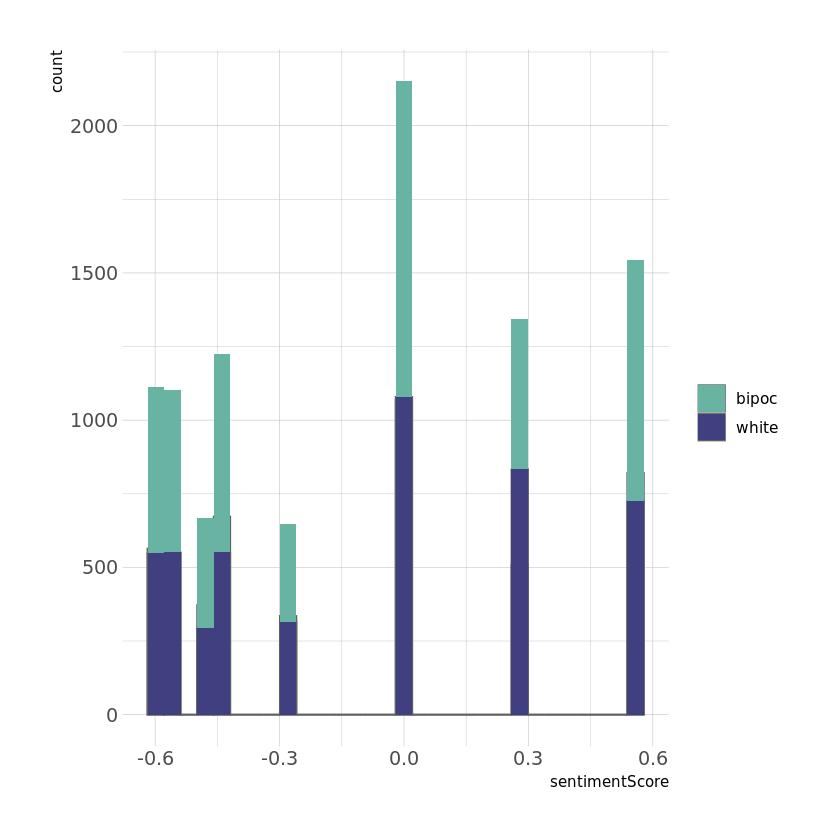

In [12]:
by.ethnicity <- df %>%
  ggplot( aes(x=sentimentScore, fill=ethnicity)) +
    geom_histogram( color="#5e6162", alpha=0.6, position = 'identity') +
    scale_fill_manual(values=c("#69b3a2", "#404080")) +
    theme_ipsum() +
    stat_bin(bins=30) +
    labs(fill="")
by.ethnicity

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



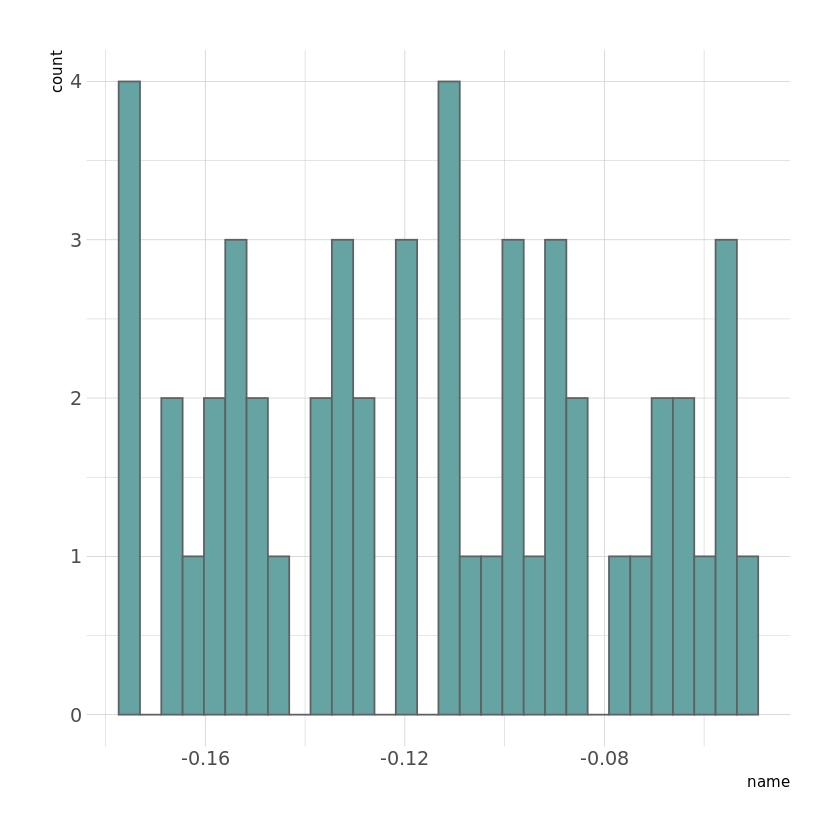

In [13]:
df %>%
  group_by(participantId) %>%
  summarise_at(vars(sentimentScore), list(name = mean)) %>% 
  ggplot(aes(x=name)) +
    geom_histogram(color="#5e6162", fill="#66a3a3") +
    theme_ipsum()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



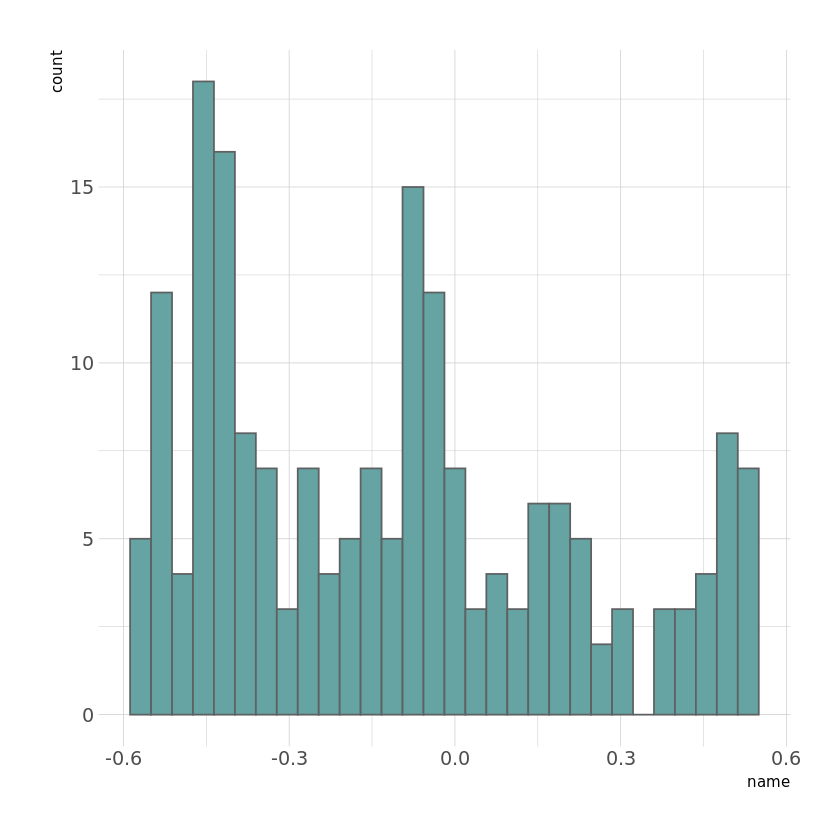

In [14]:
df %>%
  group_by(photoId) %>%
  summarise_at(vars(sentimentScore), list(name = mean)) %>% 
  ggplot(aes(x=name)) +
    geom_histogram(color="#5e6162", fill="#66a3a3") +
    theme_ipsum()

## Maximal random effects structure

In [15]:
# control=lmerControl(optimizer ="Nelder_Mead", calc.derivs=FALSE,optCtrl=list(maxfun=2e6),check.nobs.vs.nRE = "ignore")
# m1<-lmer(
#     sentimentScore ~ 1 + sexC*ethnicityC + (1 + sexC*ethnicityC|participantId) + (1 | photoId), 
#     data = df,
#     control=control)
# summary(m1)

In [16]:
# MAXIMAL MODEL doesn't converge at all / tried multiple optimizers 

## Simplified random effects structure

In [17]:
control=lmerControl(optimizer ="Nelder_Mead", calc.derivs=FALSE,optCtrl=list(maxfun=2e6),check.nobs.vs.nRE = "ignore")
m2<-lmer(
    sentimentScore ~ 1 + sexC*ethnicityC + (1 + sexC*ethnicityC|participantId), 
    data = df,
    control=control)
summary(m2)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: sentimentScore ~ 1 + sexC * ethnicityC + (1 + sexC * ethnicityC |  
    participantId)
   Data: df
Control: control

REML criterion at convergence: 10454.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.2736 -0.9325  0.1982  0.9006  1.7670 

Random effects:
 Groups        Name            Variance  Std.Dev.  Corr             
 participantId (Intercept)     5.286e-04 0.0229903                  
               sexC            1.208e-06 0.0010989 -1.00            
               ethnicityC      7.772e-07 0.0008816 -1.00  1.00      
               sexC:ethnicityC 4.208e-06 0.0020512  1.00 -1.00 -1.00
 Residual                      1.694e-01 0.4115993                  
Number of obs: 9792, groups:  participantId, 51

Fixed effects:
                  Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)       -0.11533    0.00526   50.04370 -21.926  < 2e-16 ***
sexC        

In [18]:
# Anova(m2,type=3,t="F")  
# ------------------- 
# it won't coverge

In [19]:
## Type III anova table with p-values for F-tests based on Satterthwaite's
## method:
(aov <- anova(m2))

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
sexC,0.6276386,0.6276386,1,8285.678,3.704763,0.0542915705
ethnicityC,2.0175219,2.0175219,1,8763.875,11.908829,0.0005613194
sexC:ethnicityC,1.0217626,1.0217626,1,8386.140,6.031160,0.0140756338


## Model interpretation

In [20]:
# sex-photo effect:
# The effect of sex-photo on sentiment-score was not significant, b = -0.01602, F(1,51) = 3.7, p = 0.054
# Averaging across POC and Caucasian photo-faces, and controlling for ethnicity and the ethnicity-photo by sex-photo interaction,
# sentiment-scores were -0.016 more negative in response to male faces than female faces. 

In [21]:
# ethnicity-photo effect:
# The effect of ethnicity-photo on sentiment-scores was significant, b =  0.028, F(1,51) = 11.9, p < .001.
# For sake of completeness:
# Averaging across female and male photos, and controlling for sex-photo and the sex-photo by ethnicity-photo interaction,
# sentiment-scores were 0.028 more positive in response to caucasian-photos than poc-photos

In [22]:
# Face by odor interaction:
# The face by odor interaction was significant, b = 0.04, F(1,51) = 6.03, p = 0.014.
# For sake of completeness:
# Controlling for lower-order effects, the difference in sentiment-scorees between the two sex-photo conditions 
# was 0.04 points greater in the caucasian-photos than in the poc-photos

## Indiviual subject data points

In [23]:
p = ggplot(df,aes(sex,sentimentScore,color=ethnicity,group=ethnicity))+
    geom_point()+
    geom_smooth(method="lm",se=F)+
    facet_wrap(~participantId)+
    theme_bw()

# pngfile <- fs::path(knitr::fig_path(),  "resolution.png")
# agg_png(pngfile, width = 7087, height = 4252, units = "px", res = 900)
# plot(p)
# invisible(dev.off())
# knitr::include_graphics(pngfile)

In [24]:
pngfile <- fs::path(knitr::fig_path(),  "scaling.png")
agg_png(pngfile, width = 60, height = 60, units = "cm", res = 300, scaling = 2.5)
plot(p)
invisible(dev.off())
knitr::include_graphics(pngfile)

`geom_smooth()` using formula 'y ~ x'



[1] "figure/-1/scaling.png"
attr(,"class")
[1] "knit_image_paths" "knit_asis"       

![image](figure/-1/scaling.png)

## Testing model assumptions & influence/leverage

- Linearity: Do not need to check, because my covariates are categorical.

- **Homogeneity of variance**: Need to Check by plotting residuals vs predicted values.

This one is fine

- **Normality of error term**: need to check by histogram, QQplot of residuals, even Kolmogorov-Smirnov test.

This one is not fine (not normal error)

- **Influence**: no problems here

- **Leverage**: no problems here

https://stats.stackexchange.com/questions/376273/assumptions-for-lmer-models

### Homogeneity of Variance

In [25]:
# ANOVA of the between subjects residuals.
# the assumption is that the variance is not going to differ, we would hope to see 
# NO STATISTICAL DIFFERENCES in the following procedure (i.e. p>0.05)

In [26]:
df$Model.F.Res<- residuals(m2) #extracts the residuals and places them in a new column in our original data table
df$Abs.Model.F.Res <-abs(df$Model.F.Res) #creates a new column with the absolute value of the residuals
df$Model.F.Res2 <- df$Abs.Model.F.Res^2 #squares the absolute values of the residuals to provide the more robust estimate
Levene.Model.F <- lm(Model.F.Res2 ~ participantId, data=df) #ANOVA of the squared residuals
anova(Levene.Model.F) #displays the results

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
participantId,1,8.550194e-04,0.0008550194,0.04111845,0.8393137
Residuals,9790,2.035738e+02,0.0207940576,NA,NA


In [27]:
# Since the p value is greater than 0.05, we can say that the variance of the residuals is equal and 
# therefore the assumption of #homoscedasticity is met 

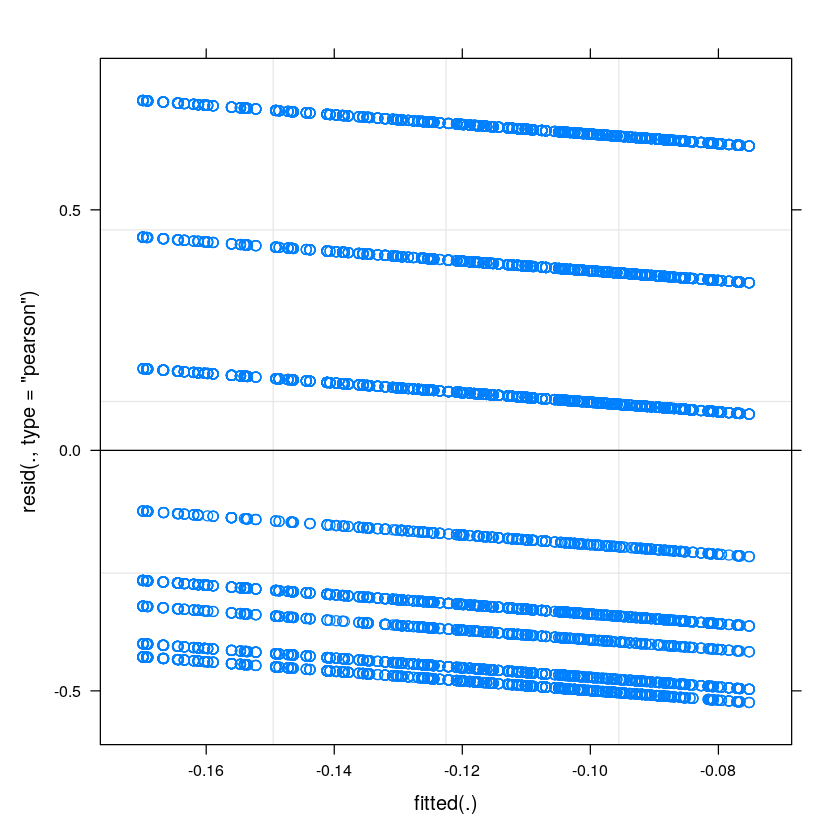

In [28]:
Plot.Model.F <- plot(m2) #creates a fitted vs residual plot
Plot.Model.F

Another approach...

In [29]:
resid1 <- hlm_resid(m2, level = 1, standardize = TRUE)

**Level 1 residuals**: observation level  

`geom_smooth()` using formula 'y ~ x'



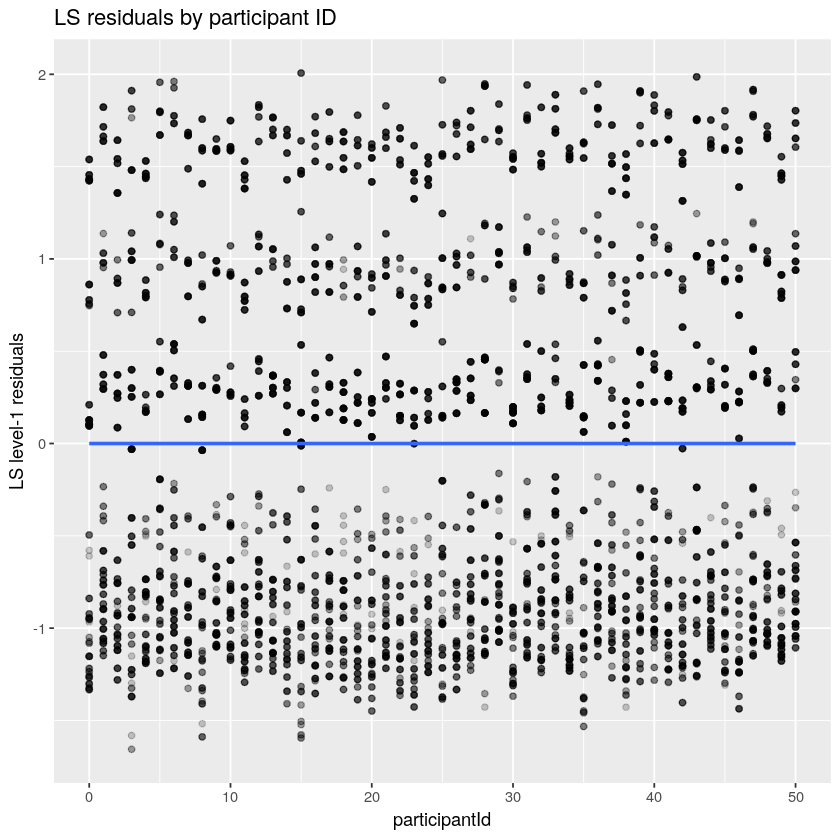

In [30]:
ggplot(data = resid1, aes(x = participantId, y = .std.ls.resid)) + 
  geom_point(alpha = 0.2) +
  geom_smooth(method = "loess", se = FALSE) + 
  labs(y = "LS level-1 residuals", 
       title = "LS residuals by participant ID")

**Level 2**: grouped level residuals (by participant)

In [31]:
resid2 = hlm_resid(m2, level = "participantId", standardize = TRUE, include.ls = FALSE)

`geom_smooth()` using formula 'y ~ x'



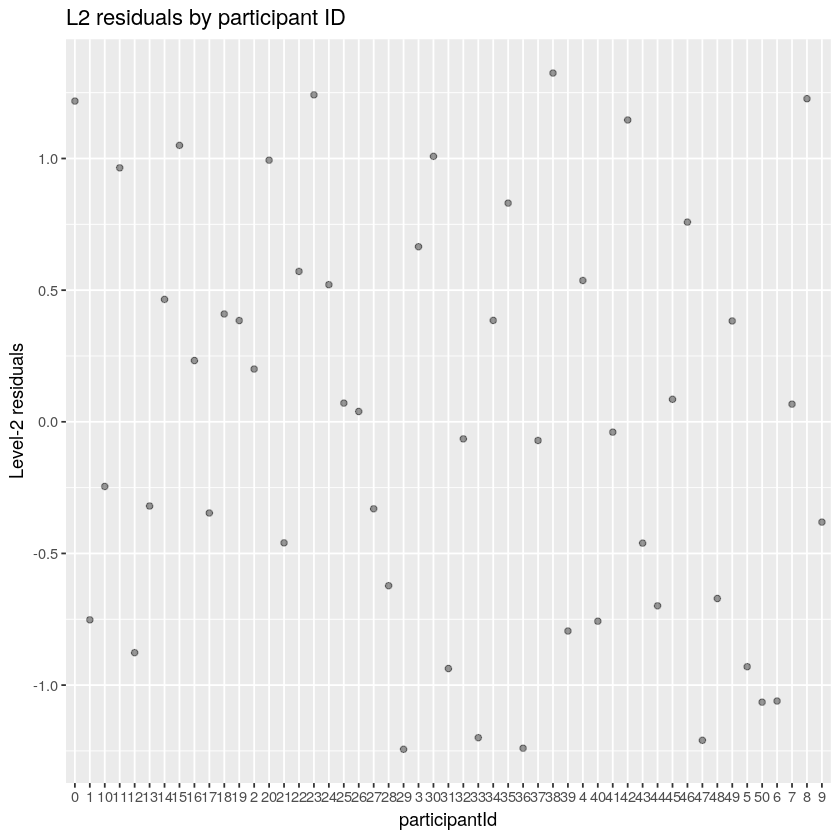

In [32]:
ggplot(data = resid2, aes(x = participantId, y = .std.ranef.intercept)) + 
  geom_point(alpha = 0.4) +
  geom_smooth(method = "loess", se = FALSE) + 
  labs(y = "Level-2 residuals", 
       title = "L2 residuals by participant ID")

`geom_smooth()` using formula 'y ~ x'



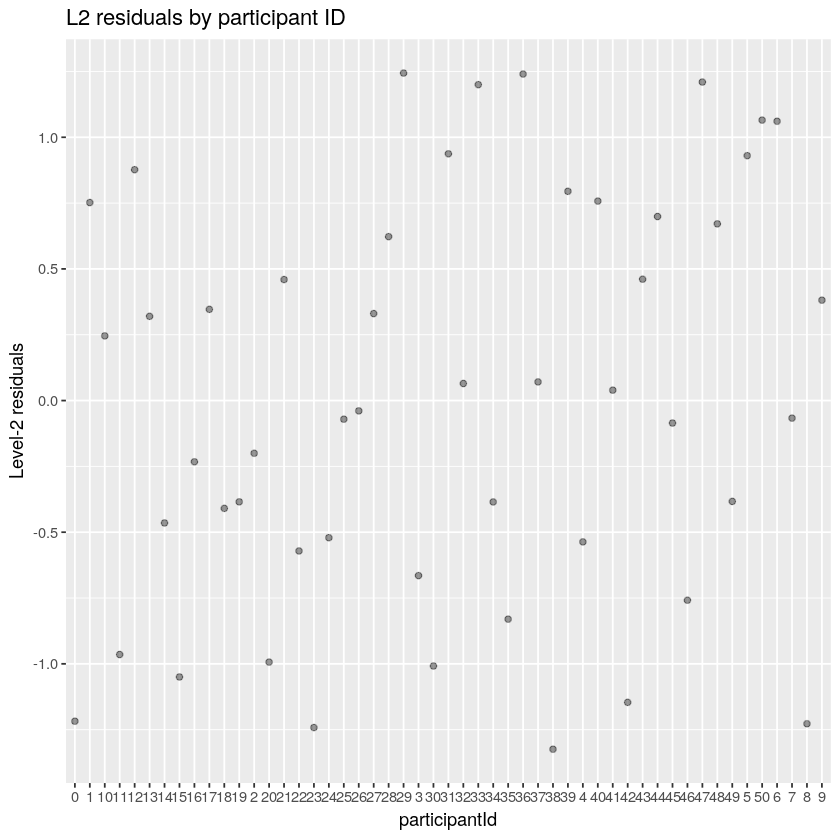

In [33]:
ggplot(data = resid2, aes(x = participantId, y = .std.ranef.sex_c)) + 
  geom_point(alpha = 0.4) +
  geom_smooth(method = "loess", se = FALSE) + 
  labs(y = "Level-2 residuals", 
       title = "L2 residuals by participant ID")

`geom_smooth()` using formula 'y ~ x'



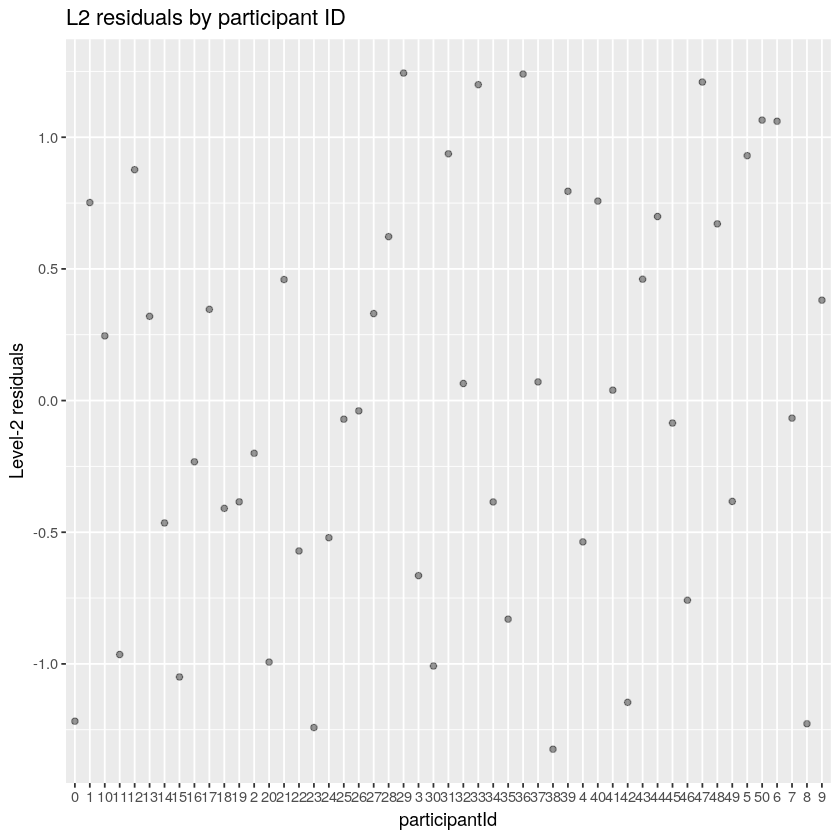

In [34]:
ggplot(data = resid2, aes(x = participantId, y = .std.ranef.ethnicity_c)) + 
  geom_point(alpha = 0.4) +
  geom_smooth(method = "loess", se = FALSE) + 
  labs(y = "Level-2 residuals", 
       title = "L2 residuals by participant ID")

`geom_smooth()` using formula 'y ~ x'



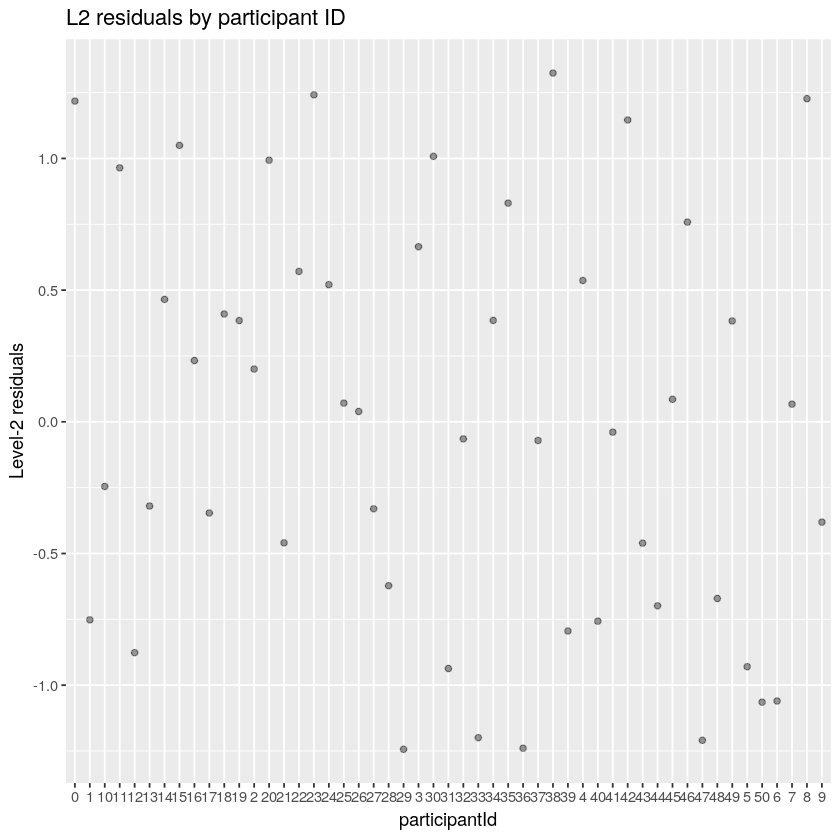

In [35]:
ggplot(data = resid2, aes(x = participantId, y = .std.ranef.sex_c_ethnicity_c)) + 
  geom_point(alpha = 0.4) +
  geom_smooth(method = "loess", se = FALSE) + 
  labs(y = "Level-2 residuals", 
       title = "L2 residuals by participant ID")

### Normality of the error term (the residuals of the model are normally distributed)

In [36]:
require("lattice")

Loading required package: lattice

Warning message:
“package ‘lattice’ was built under R version 4.0.3”


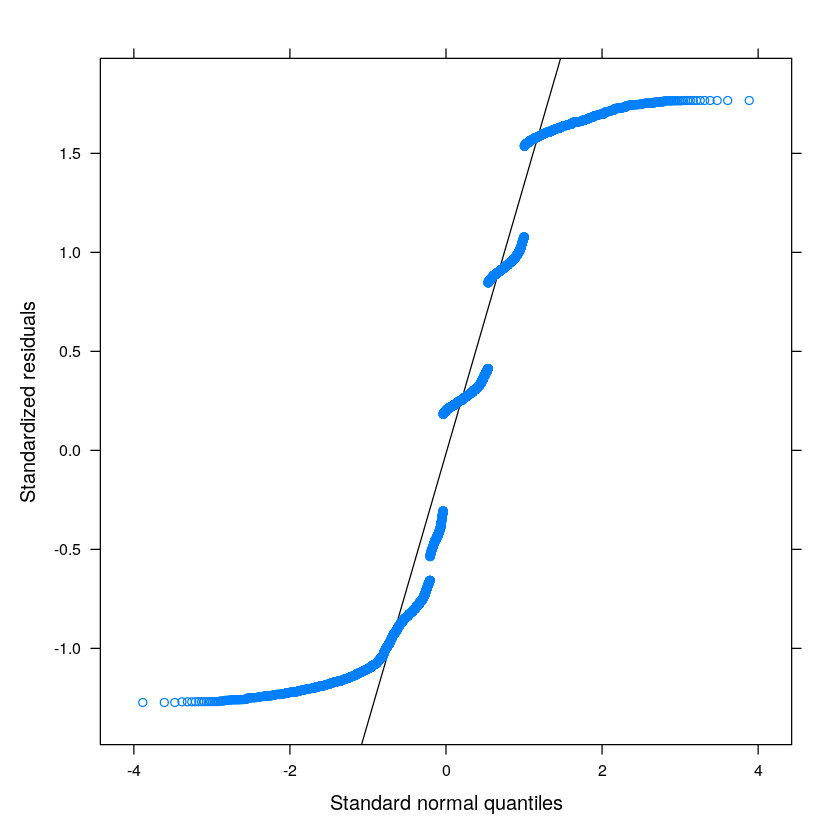

In [37]:
qqmath(m2, id=0.05) #id: identifies values that may be exerting undue influence on the model (i.e. outliers)

In [57]:
# looks not normal...
# https://ademos.people.uic.edu/Chapter18.html

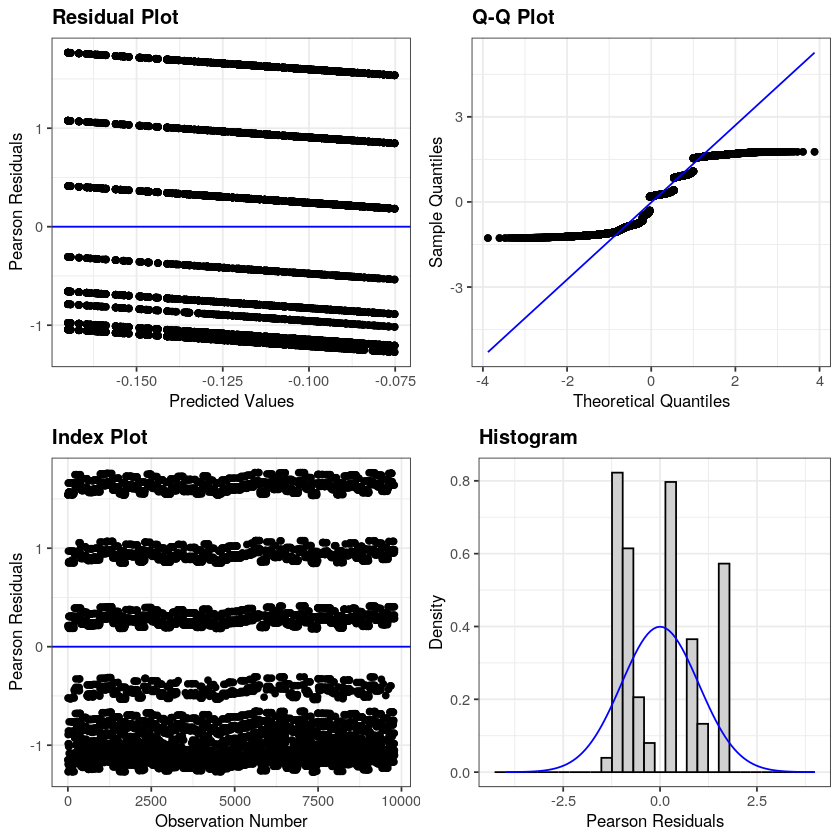

In [38]:
resid_panel(m2)

## Influence

### Influencial datapoints

In [39]:
infl <- hlm_influence(m2, level = 1)

In [40]:
CutOff = 4/nrow(infl)
print(CutOff)

[1] 0.0004084967


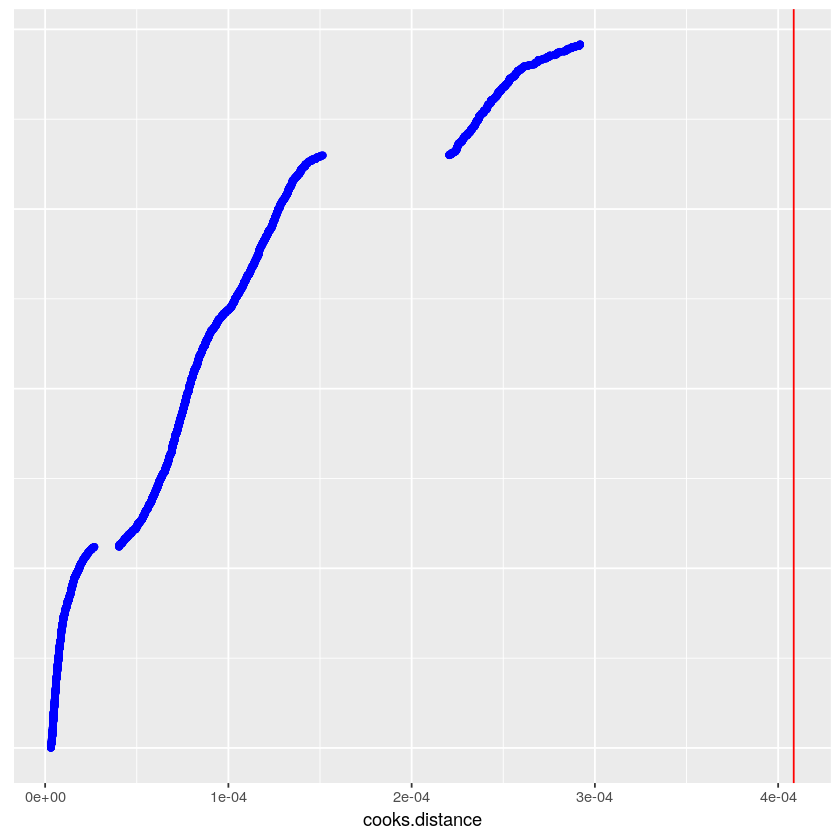

In [41]:
# dotplot_diag(infl$cooksd, name = "cooks.distance", cutoff = "internal")
dotplot_diag(infl$cooksd, name = "cooks.distance", cutoff = CutOff)

In [42]:
tb1 <- infl %>%
  arrange(desc(cooksd))

head(tb1)

id,sentimentScore,sexC,ethnicityC,participantId,cooksd,mdffits,covtrace,covratio,leverage.overall
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5614,0.5574,0.5,-0.5,29,0.0002919056,0.0002917967,0.0003731266,1.000373,0.00221839
5598,0.5574,0.5,-0.5,29,0.0002919056,0.0002917967,0.0003731266,1.000373,0.00221839
5704,0.5574,0.5,-0.5,29,0.0002919056,0.0002917967,0.0003731266,1.000373,0.00221839
5698,0.5574,0.5,-0.5,29,0.0002919056,0.0002917967,0.0003731266,1.000373,0.00221839
5702,0.5574,0.5,-0.5,29,0.0002919056,0.0002917967,0.0003731266,1.000373,0.00221839
5727,0.5574,0.5,-0.5,29,0.0002919056,0.0002917967,0.0003731266,1.000373,0.00221839


In [41]:
## Nothing above traditional cutoffs

### Influential individuals

In [43]:
infl.classes <- hlm_influence(m2, level = "participantId")

In [44]:
CutOffGroup = 4/51
CutOffGroup

[1] 0.07843137

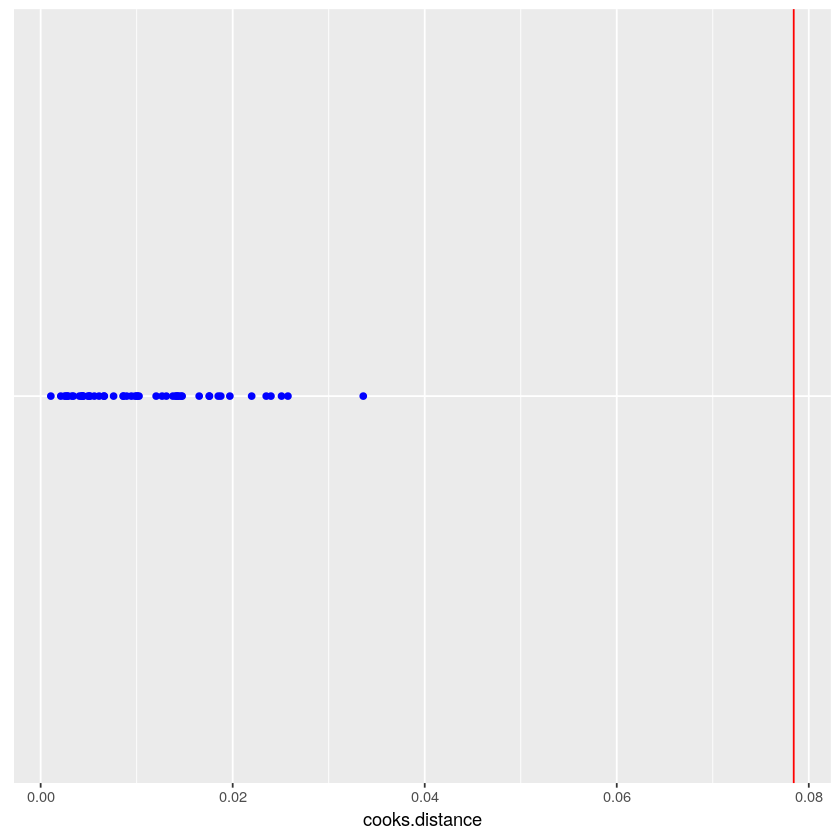

In [45]:
# dotplot_diag(infl.classes$cooksd, name = "cooks.distance", cutoff = "internal", modify = "dotplot")
dotplot_diag(infl.classes$cooksd, name = "cooks.distance", cutoff = CutOffGroup, modify = "dotplot")

## Leverage

https://online.stat.psu.edu/stat501/lesson/11/11.2

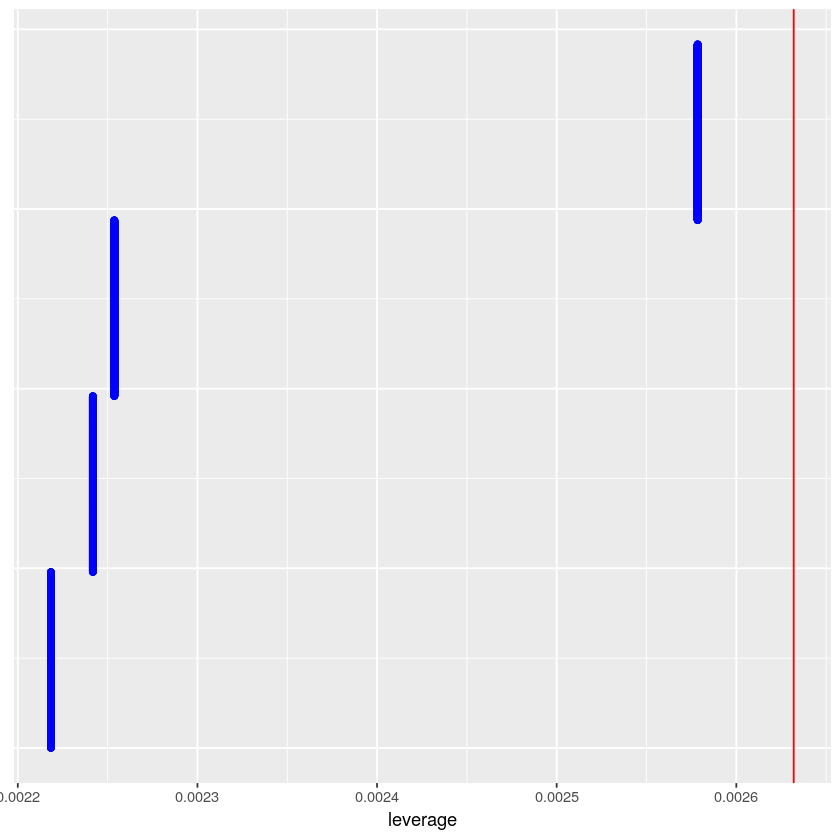

In [46]:
dotplot_diag(infl$leverage.overall, name = "leverage", cutoff = "internal")

### Leverage participants

In [47]:
CutOffLeverageParticipants = mean(infl.classes$leverage.overall)*3
CutOffLeverageParticipants

[1] 0.006969274

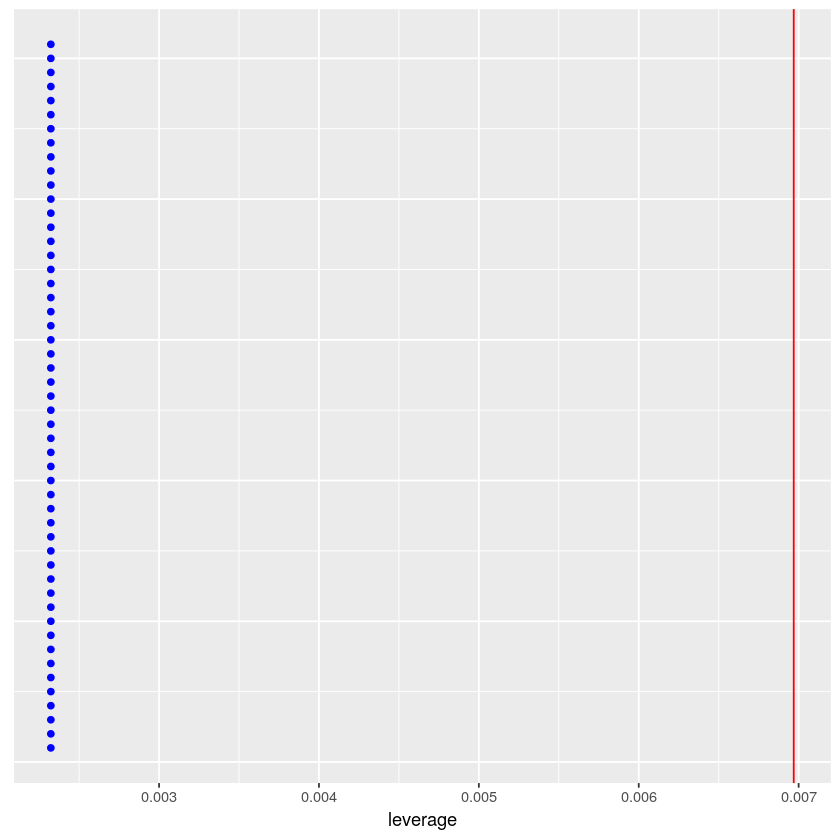

In [48]:
dotplot_diag(infl.classes$leverage.overall, name = "leverage", cutoff = CutOffLeverageParticipants)

# ANOVA 2 X 2

In [49]:
library(rstatix)
library(ggpubr)
library(ez) 

Warning message:
“package ‘rstatix’ was built under R version 4.0.3”

Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter


Warning message:
“package ‘ggpubr’ was built under R version 4.0.5”
Warning message:
“package ‘ez’ was built under R version 4.0.5”


In [50]:
df %>%
  group_by(sex, ethnicity) %>%
  get_summary_stats(sentimentScore, type = "mean_sd")

ethnicity,sex,variable,n,mean,sd
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
bipoc,female,sentimentScore,2448,-0.111,0.418
white,female,sentimentScore,2448,-0.103,0.412
bipoc,male,sentimentScore,2448,-0.148,0.411
white,male,sentimentScore,2448,-0.099,0.408


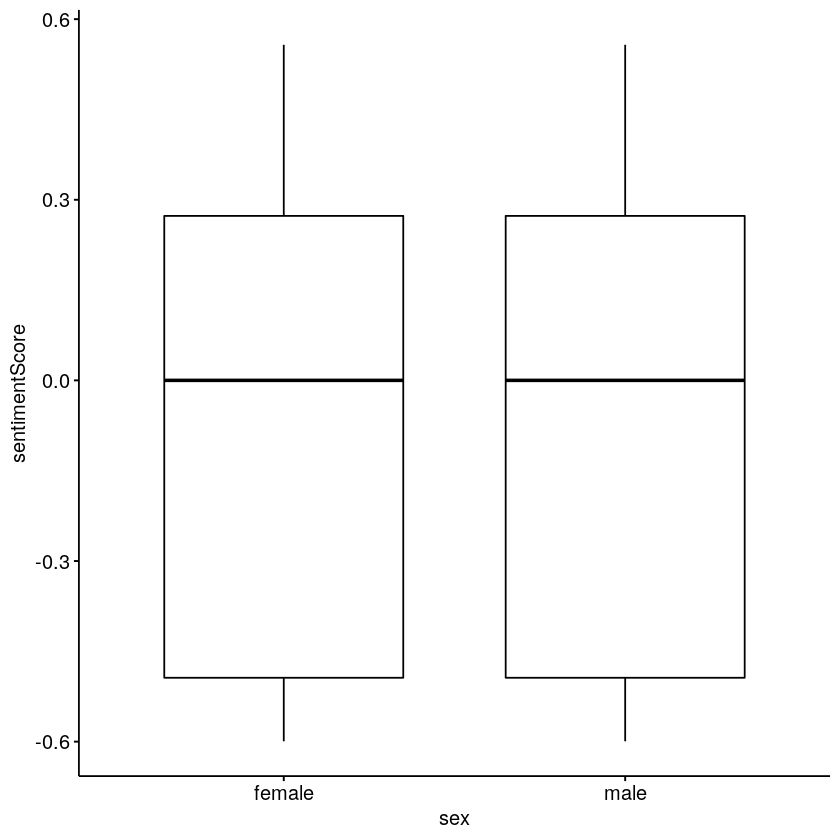

In [51]:
bxp.sex <- ggboxplot(
    df, 
    x = "sex",
    y = "sentimentScore",
    palette = "jco"
  )
bxp.sex

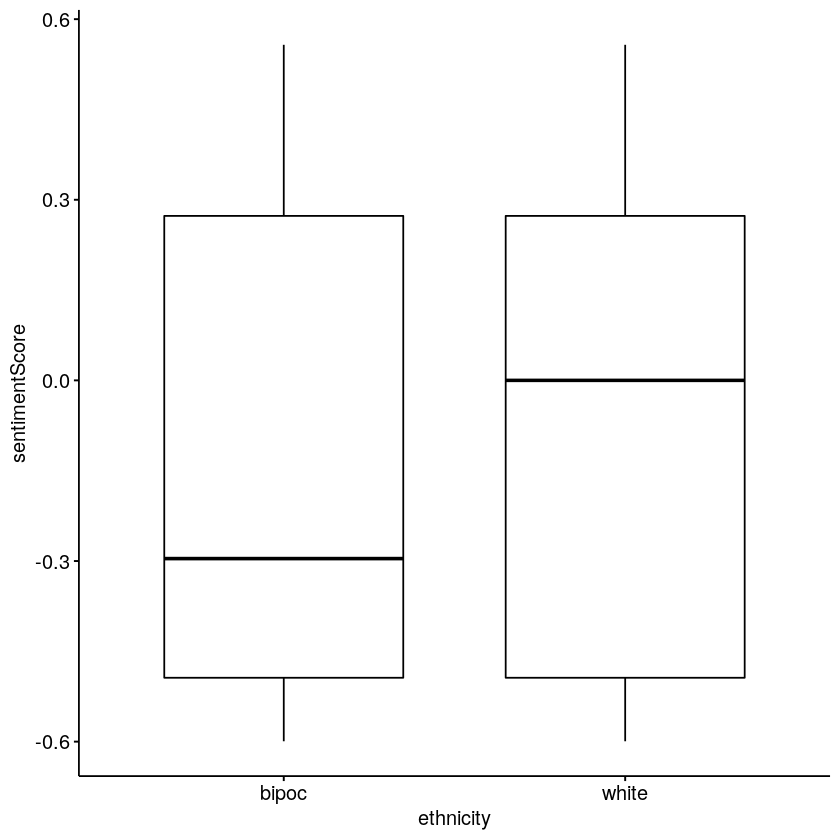

In [52]:
bxp.ethnicity <- ggboxplot(
    df, 
    x = "ethnicity",
    y = "sentimentScore",
    palette = "jco"
  )
bxp.ethnicity

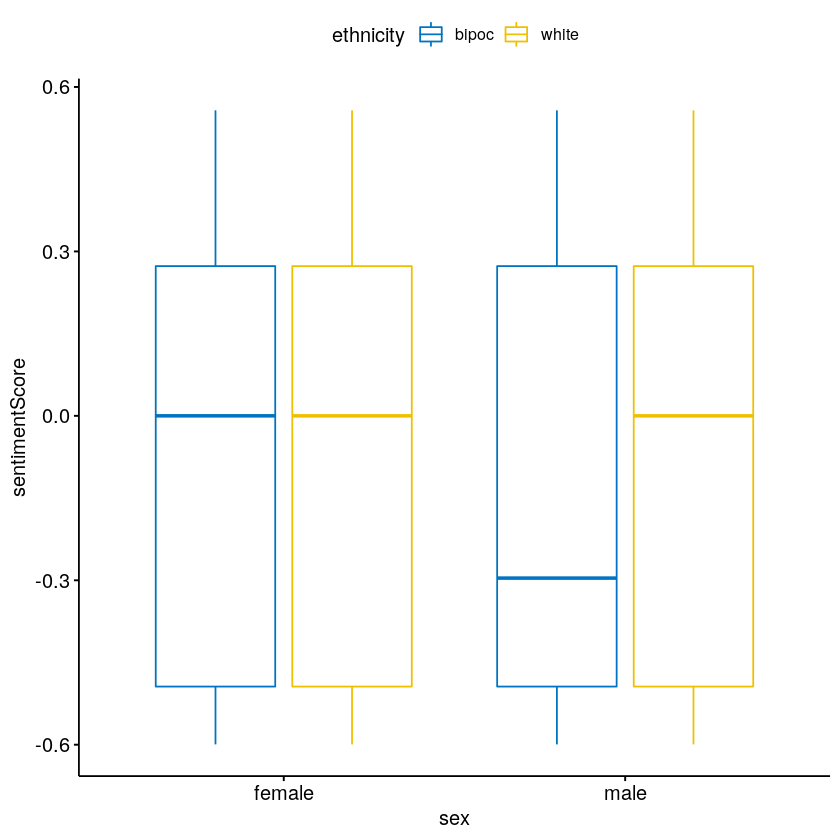

In [53]:
bxp <- ggboxplot(
    df,
    x = "sex",
    y = "sentimentScore",
    color = "ethnicity",
    palette = "jco"
  )
bxp

In [54]:
df %>%
  group_by(ethnicity, sex) %>%
  identify_outliers(sentimentScore)

ethnicity,sex,participantId,photoId,emotion,age,label,url,sentimentScore,sexC,ageC,ethnicityC,Model.F.Res,Abs.Model.F.Res,Model.F.Res2,is.outlier,is.extreme
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>


In [55]:
# no outliers...

In [56]:
df %>%
  group_by(ethnicity, sex) %>%
  shapiro_test(sentimentScore)

ethnicity,sex,variable,statistic,p
<chr>,<chr>,<chr>,<dbl>,<dbl>
bipoc,female,sentimentScore,0.8622749,5.363882e-42
bipoc,male,sentimentScore,0.8525342,4.881664e-43
white,female,sentimentScore,0.8709462,5.101872e-41
white,male,sentimentScore,0.8782019,3.699178e-40


In [57]:
# not normal

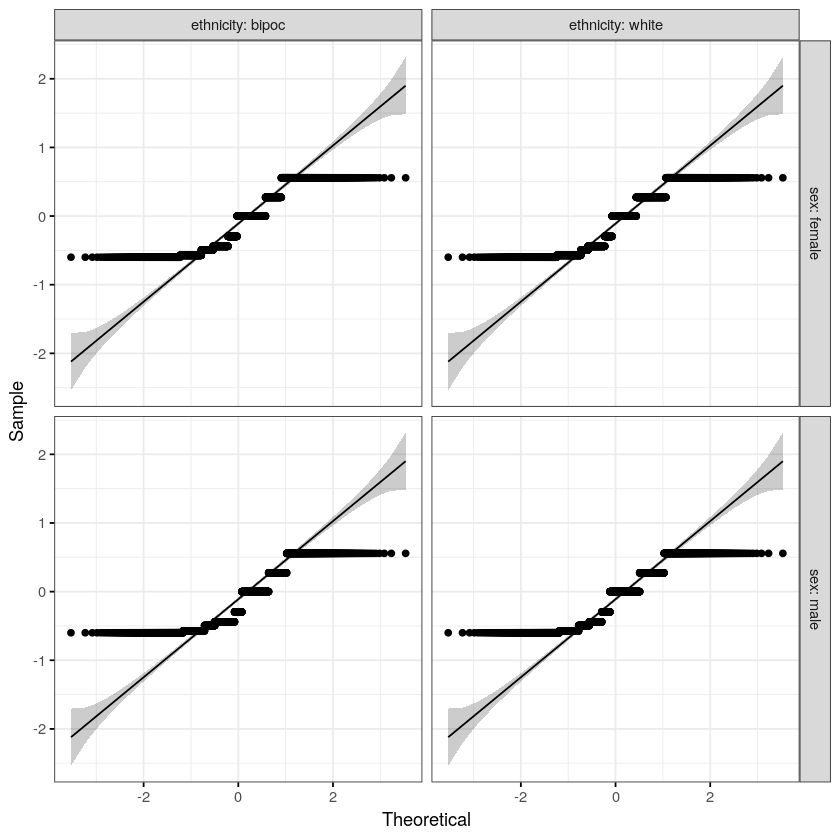

In [58]:
ggqqplot(df, "sentimentScore", ggtheme = theme_bw()) +
  facet_grid(sex ~ ethnicity, labeller = "label_both")

In [59]:
res.aov  = ezANOVA(data=df,
                   wid=.(participantId), 
                   dv=.(sentimentScore), 
                   within=.(sex, ethnicity))
res.aov  

Warning message:
“Converting "participantId" to factor for ANOVA.”
Warning message:
“Converting "sex" to factor for ANOVA.”
Warning message:
“Converting "ethnicity" to factor for ANOVA.”
Warning message:
“Collapsing data to cell means. *IF* the requested effects are a subset of the full design, you must use the "within_full" argument, else results may be inaccurate.”


,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
2,sex,1,50,9.521419,3.306335e-03,*,0.02562756
3,ethnicity,1,50,31.530648,8.618142e-07,*,0.07794607
4,sex:ethnicity,1,50,13.324762,6.258531e-04,*,0.04105782
